In [6]:
#IN THIS notebook i will dicussed th sequential or prompt chaining workflows

In [27]:
class TestingState(BaseModel):
    a:int
    b:int
    result: Optional[int] = None

In [36]:
def multiplication(state:TestingState):
    num1 = state.a
    num2 = state.b
    return {"result": num1 * num2}


In [37]:
from langgraph.graph import StateGraph,START,END

In [38]:
graph = StateGraph(TestingState)

In [39]:
graph.add_node("multiplication",multiplication)
graph.add_edge(START,"multiplication")
graph.add_edge("multiplication",END)

In [40]:
workflow=graph.compile()

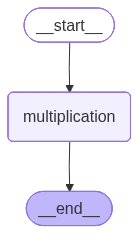

In [41]:
from IPython.display import display, Image

try:
    img_data = workflow.get_graph().draw_mermaid_png()
    display(Image(data=img_data))
except Exception as e:
    print(f"Problem: There was a problem: {e}")


In [42]:
initial_state = {"a":12,"b":13}
result=workflow.invoke(initial_state)
print(result)

{'a': 12, 'b': 13, 'result': 156}
